In [193]:
import numpy as np
import matplotlib.pyplot as plt

### Generación de ruido 

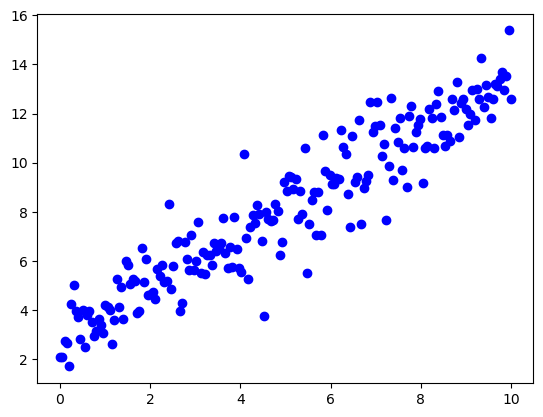

In [194]:
# y = 1*x + 3
# y = a*x + b
# 0 < x < 10
a = 1   # Representa la inclinación de la línea, cuanto más grande sea el valor más inclinación tendrá.
b = 3   # Representa la altura en la que comienza la línea.
lx = np.linspace(0, 10, 200)
ly = a*lx + b
ruido = np.random.randn(200)    # Me genera la cantidad de números aleatorios que le propongo .
ly = ly + ruido


# plt.plot(lx, ly, color = 'b') # Para que una todos los puntos con una línea.
plt.scatter(lx, ly, color = 'b') # Para pintar los puntos en el gráfico.


# ESTOS SON LOS PUNTOS DE DONDE PARTIMOS, REPRESENTANDO EL PESO CORPORAL (Y) Y LA ALTURA (X) DE CADA PERSONA

### Añadimos valores a las variables 'a' y 'b'

In [195]:
a = 10
b = 9

### Funciones auxiliares

In [196]:
def predice(x):
    y_hat = a*x + b # Calcula las Ys que le corresponde a cada X.
    return y_hat

# Función que calcula el error de cada punto nuevo hecho
# Se pasan las 'x' y las y reales 'y' devuelve el array de errores de cada 'x'
def error(x, y):
    y_hat = predice(x)
    err = y_hat - y
    return err

# Se le pasan las 'x' y las 'y' reales y devuelve el coste cuadrático medio
# 1/(2n) * ∑(yi_hat - yi)²
def coste(x, y):
    err = error(x,y)
    c = err**2
    c = c.mean()
    c = c/2
    return c

**MSE (Error Medio Cuadrático)** -> Métrica de error cuando queremos predecir un número real. [ Promedio de los errores al cuadrado ] Lo representamos en la función 'coste'

### Realización de pruebas 

pru_x  [0.50251256 2.51256281 5.02512563]
pru_y  [4.02324058 5.79496436 8.86179114]
estimados por el modelo  [ 2.94713981  8.13507378 13.32300776]
error  [-0.55470037 -0.24082255 -0.70064733]
coste  0.14276578117313077


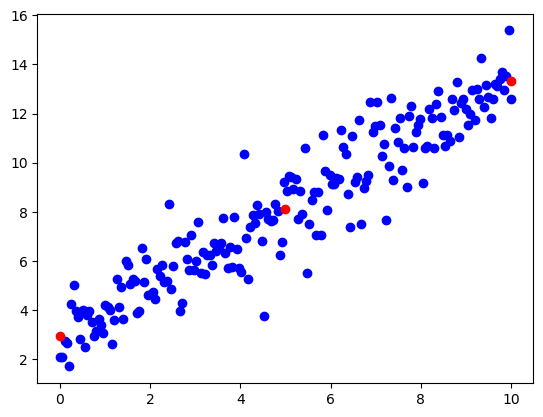

In [204]:
plt.scatter(lx, ly, color = 'b')
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])

y_hat = predice(np.array([0,5,10]))
plt.scatter([0, 5, 10], y_hat, color="r")
le = error(pru_x, pru_y )
c = coste(pru_x, pru_y)
print("pru_x ", pru_x)
print("pru_y ", pru_y)
print("estimados por el modelo ", y_hat)
print("error ", le)
print("coste ", c)

Se aplicará el descenso del gradiente
x -> x - lr X df(x)/dx

Según la regla de la cadena se multiplican las siguientes derivadas para sacar la derivada general del descenso del gradiente al haber 2 variables en lugar de 1.

In [198]:
#1/n ∑(yi_hat -yi)*xi
def deriva_coste_respecto_a(x,y):
    err = error(x,y)
    d = err*x
    d = d.mean()
    return d

#1/n ∑(yi_hat -yi) = err
def deriva_coste_respecto_b(x,y):
    d = error(x,y)
    d = d.mean()
    return d

In [199]:
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])
lr = 0.1

In [202]:
# Método que entrena el modelo, se suelen llamar 'fit', 'epochs' es el número de vueltas que se busca que de.
def fit(x_train, y_train, lr = 0.01, epochs = 100):
    global a,b
    la = []
    lb = []
    lloss = []
    for _ in range(epochs):
        
        # DERIVADAS RESPECTO A CADA VARIABLE
        da = deriva_coste_respecto_a(x_train, y_train)
        db = deriva_coste_respecto_b(x_train, y_train)

        # DESCENSO DEL GRADIENTE
        a = a - lr*da
        b = b - lr*db

        loss = coste(x_train, y_train)

        la.append(a); lb.append(b); lloss.append(loss)
        print(f"a: {a} b: {b} loss: {loss}")
    return lloss, la, lb

# Va bajando la perdida de cada vez

> La siguiente gráfica representa la pérdida:

a: 0.9835015055252899 b: 3.305949852850989 loss: 0.577518983783451
a: 0.983647124245056 b: 3.3049837960942807 loss: 0.5774236542911657
a: 0.9837923842706753 b: 3.3040201189691514 loss: 0.5773287938596815
a: 0.9839372864856983 b: 3.3030588156139924 loss: 0.5772344001810239
a: 0.9840818317714993 b: 3.302099880181634 loss: 0.5771404709585749
a: 0.9842260210072812 b: 3.301143306839309 loss: 0.5770470039070162
a: 0.9843698550700813 b: 3.300189089768618 loss: 0.5769539967522749
a: 0.9845133348347769 b: 3.299237223165494 loss: 0.5768614472314669
a: 0.9846564611740896 b: 3.298287701240166 loss: 0.5767693530928429
a: 0.9847992349585918 b: 3.2973405182171263 loss: 0.5766777120957325
a: 0.9849416570567113 b: 3.2963956683350917 loss: 0.5765865220104912
a: 0.9850837283347369 b: 3.2954531458469716 loss: 0.5764957806184444
a: 0.9852254496568232 b: 3.2945129450198314 loss: 0.5764054857118351
a: 0.9853668218849966 b: 3.293575060134858 loss: 0.5763156350937689
a: 0.9855078458791596 b: 3.2926394854873258

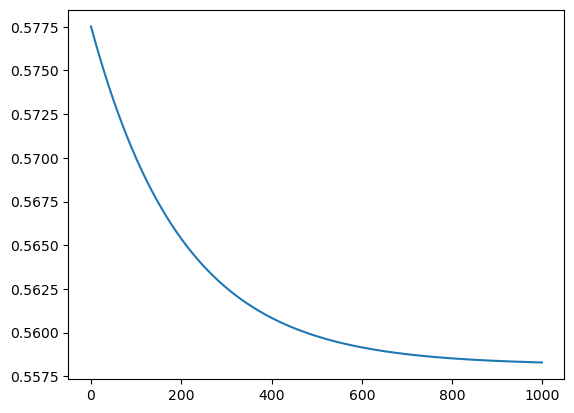

In [203]:
lloss, la, lb = fit(lx, ly, epochs= 1000)
plt.plot(range(len(lloss)), lloss)